In [1]:
from bern_sipm_script import full_run

I will use 10,000 pulses to get a sense of what my guesses should be before trying the full 100,000 pulses for better stats


Plots / Results for bern_sipm_54V


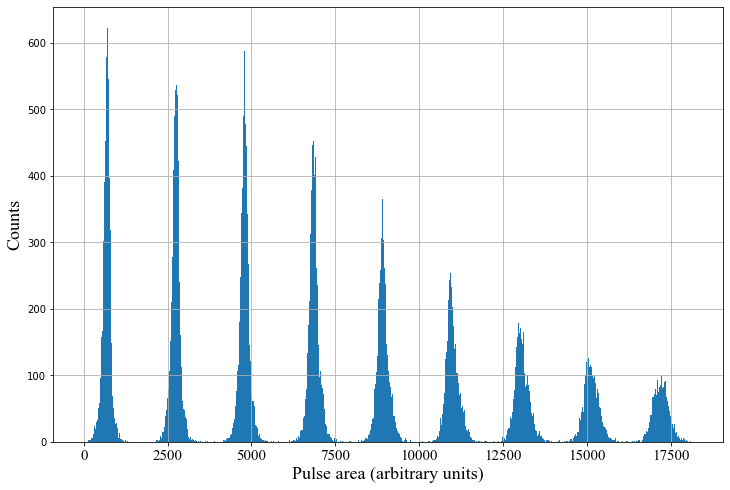

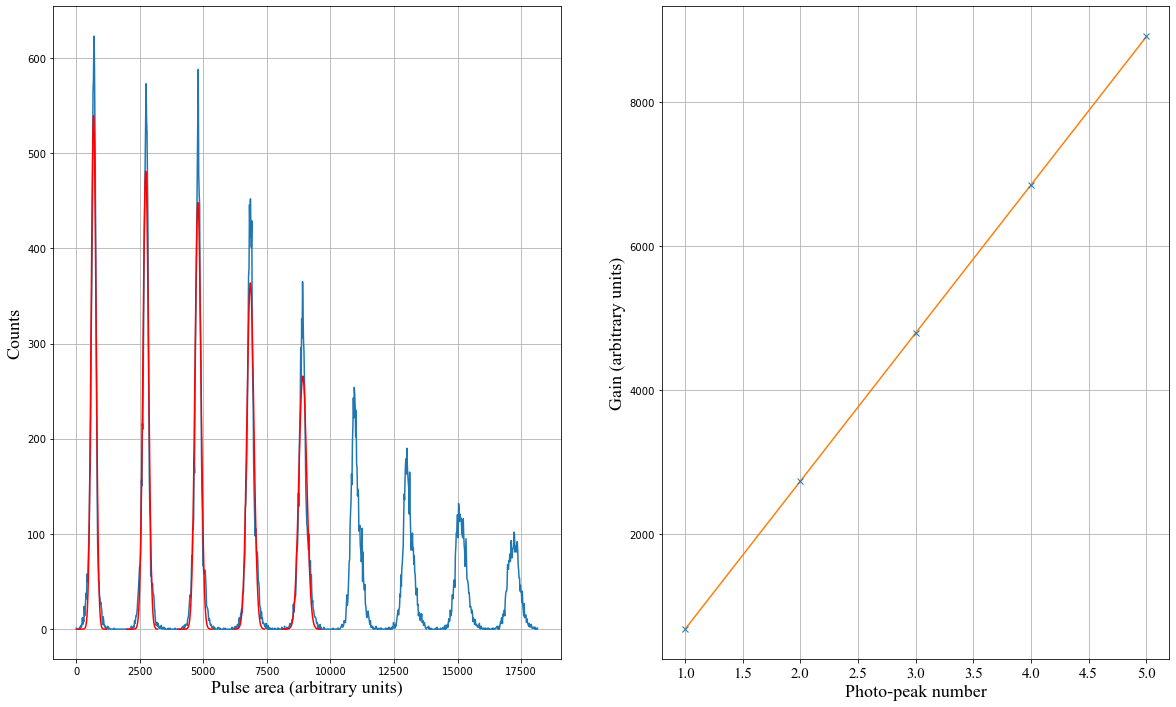


Plots / Results for bern_sipm_55V


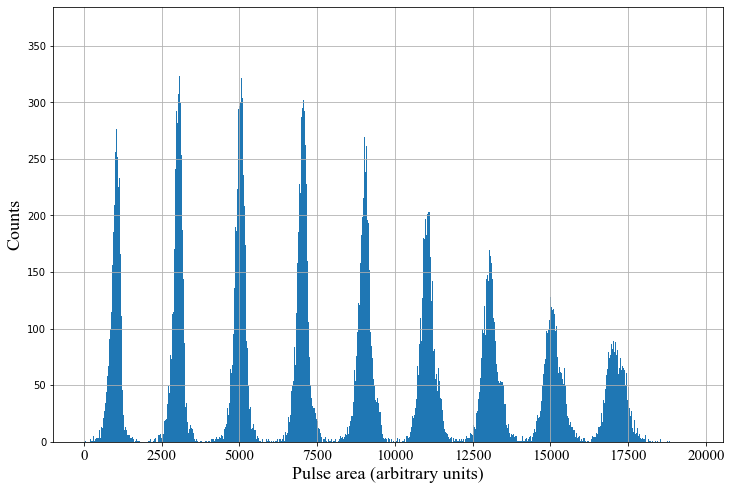

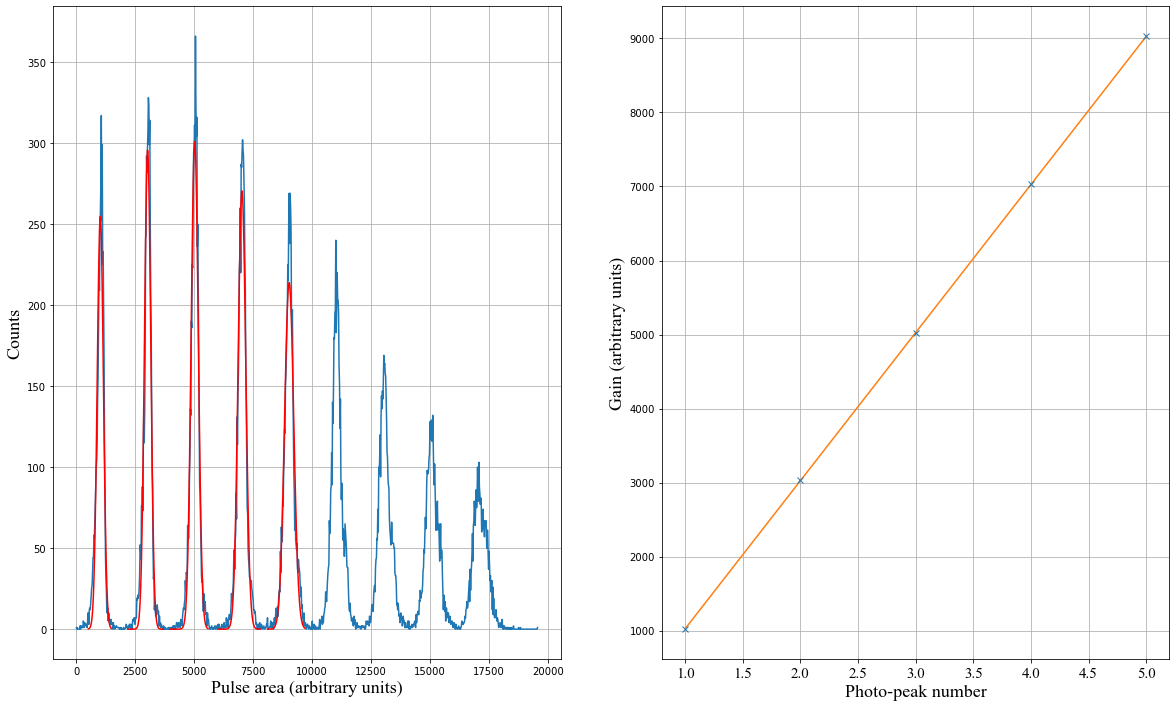


Plots / Results for bern_sipm_56V


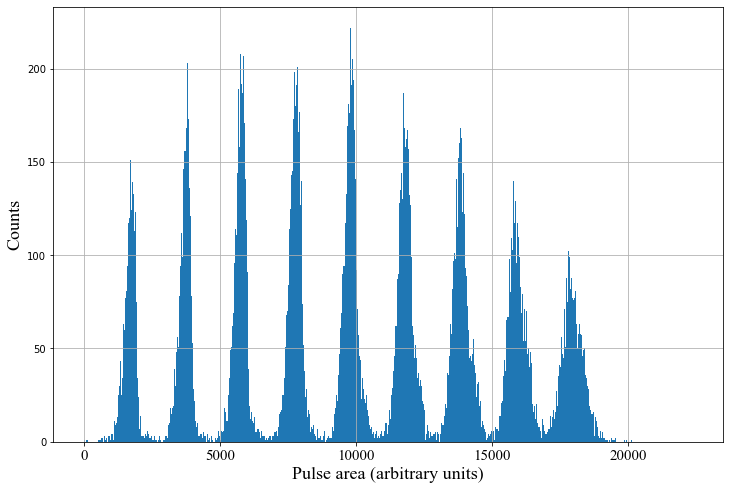

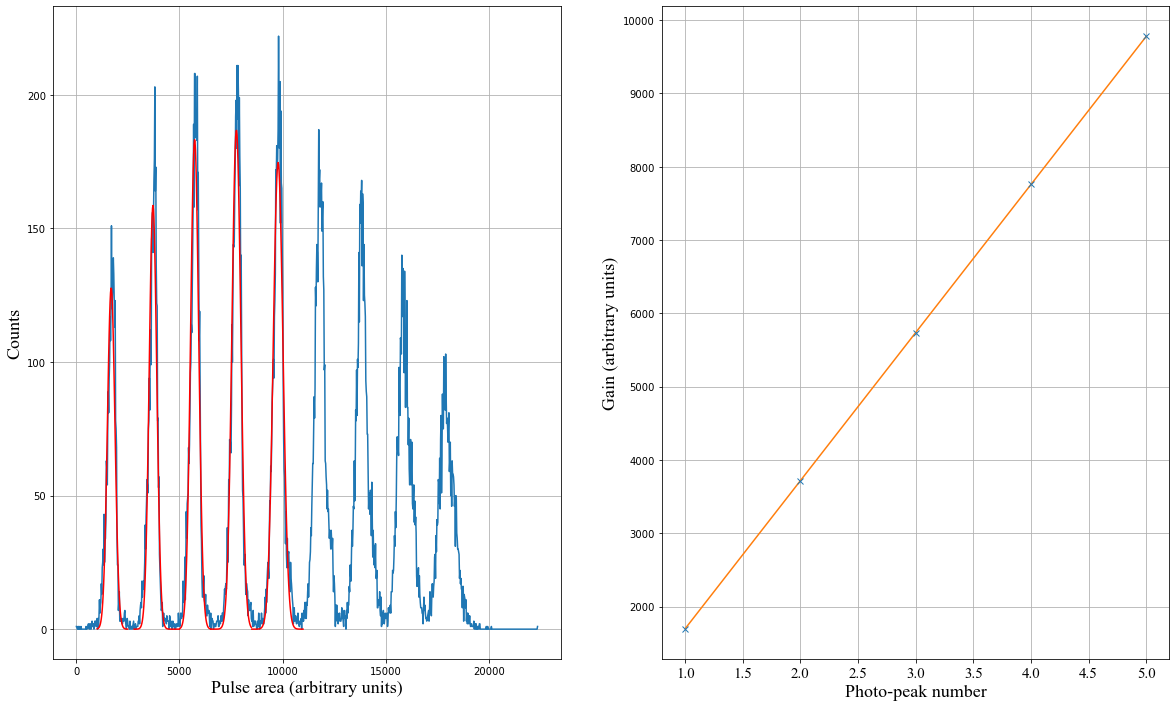


Plots / Results for bern_sipm_57V


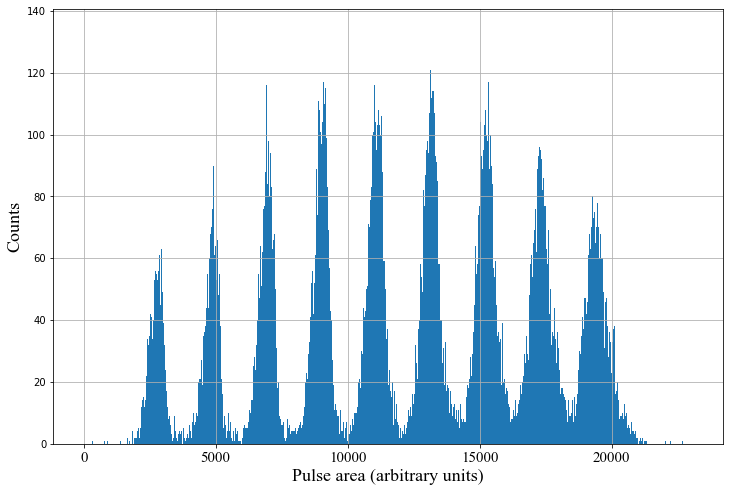

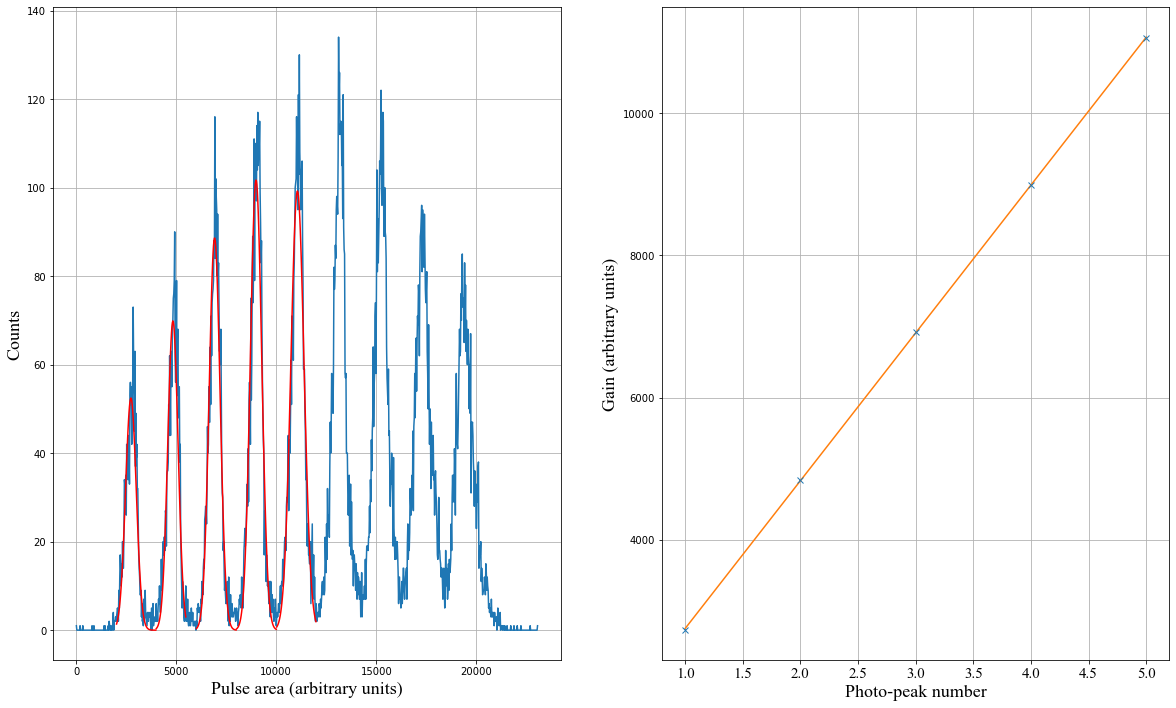

CPU times: total: 13min 23s
Wall time: 13min 34s


In [18]:
%%time

# sum guesses = [[G, a], [norm_0, mean_0, std_0], [norn_1, norm_2, ..., norm_(N-1)]]
# indep guesses = [[norm_0, mean_0, std_0, lower_lim_0, upper_lim_0], [norm_1, mean_1, std_1, lower_lim_1, upper_lim_1], ....]

# I will chose to only take the first 5 peaks for convenience and use the non-background removal method with independent gaussians

linear_fit_params = []
linear_fit_errs = []
# files_to_run = ['bern_sipm_54V', 'bern_sipm_55V', 'bern_sipm_56V', 'bern_sipm_57V']
files_to_run = ['bern_sipm_54V', 'bern_sipm_55V', 'bern_sipm_56V', 'bern_sipm_57V', 'bern_sipm_58V']
input_param_guesses = [[[600, 500, 100, 0, 1200], [500, 2500, 100, 2000, 3200], [400, 4900, 100, 4000, 5400],
                        [400, 6800, 100, 6200, 7400], [200, 8750, 100, 8100, 9600]],

                       [[300, 1000, 50, 500, 1500], [300, 2900, 100, 2200, 3700], [300, 4700, 100, 4000, 5600],
                        [300, 7100, 100, 6000, 7800], [250, 8750, 100, 8100, 9700]],

                       [[150, 1500, 100, 1000, 2500], [200, 4000, 100, 2800, 5000], [200, 5500, 200, 5000, 6500],
                        [200, 7500, 200, 6500, 8500], [200, 10000, 200, 8500, 11000]],

                       [[60, 3000, 100, 2000, 4000], [80, 5000, 100, 4000, 5500], [100, 7000, 200, 6000, 8000],
                        [110, 9000, 200, 8000, 10000], [110, 11000, 300, 10000, 12000]],

                       [[30, 2000, 200, 1500, 2700], [3, 4200, 200, 2500, 5000], [4, 6200, 300, 5000, 7200],
                        [50, 8200, 400, 7500, 9500], [6, 10500, 400, 9000, 11500]]]

for i, file_to_run in enumerate(files_to_run):
    print(f'\nPlots / Results for {file_to_run}')
    params, errs = full_run(file_to_run, 100_000, area_method='1', analysis_method='2', param_input=input_param_guesses[i])
    linear_fit_params.append(params)
    linear_fit_errs.append(errs)

We can see that as we increase the voltage, more high photo peaks get populated as we expect!

In [21]:
print(linear_fit_params)
print(linear_fit_errs)

[array([ 2056.15167859, -1373.26303257]), array([2000.48688791, -974.83603484]), array([2020.56668871, -323.4237674 ]), array([2078.5493139 ,  673.25678678])]
[array([0.50749997, 1.41482836]), array([0.78897241, 2.57459122]), array([1.21348395, 4.26238408]), array([2.01919492, 7.14564866])]


In [22]:
gradients = []
gradient_errs = []

for i, linear_fit_param in enumerate(linear_fit_params):
    gradients.append(linear_fit_param[0])
    gradient_errs.append(linear_fit_errs[i][0])

print(gradients)
print(gradient_errs)

[2056.1516785857434, 2000.486887908737, 2020.5666887144932, 2078.549313895563]
[0.5074999650333215, 0.7889724054073207, 1.2134839489251268, 2.0191949204853836]
